<a href="https://colab.research.google.com/github/wiroel/F1AML/blob/main/standardScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt



from google.colab import drive

In [17]:
file_path= '/content/drive/MyDrive/Social_Network_Ads.csv'
df = pd.read_csv(file_path)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


train test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

standardscalar

In [21]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [24]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [25]:
X_train_scaled #gives a numoy aray

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [26]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)


In [29]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [30]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


effect of scaling

<function matplotlib.pyplot.show(close=None, block=None)>

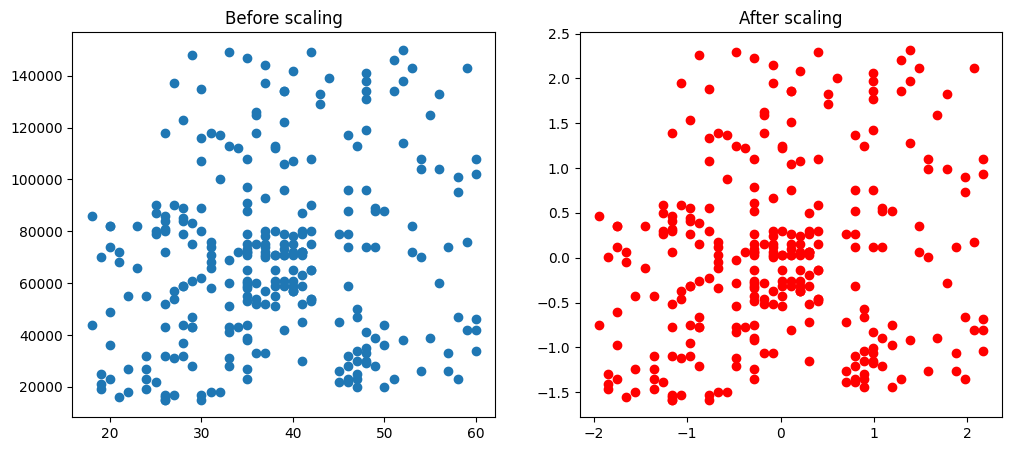

In [40]:
fig, (ax1, ax2)= plt.subplots(ncols =2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After scaling')
plt.show

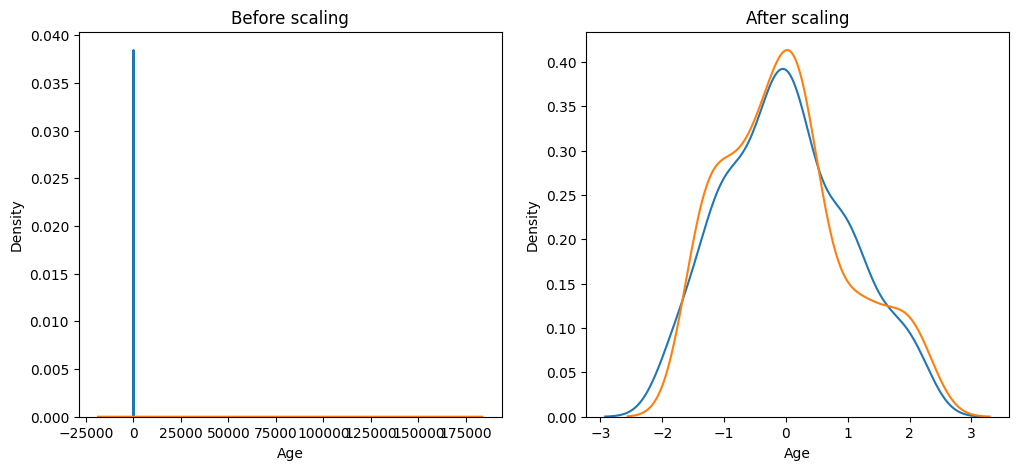

In [43]:
import seaborn as sns

fig, (ax1, ax2)= plt.subplots(ncols =2, figsize=(12,5))
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

why scaling important

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [48]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [56]:
from sklearn.metrics import accuracy_score

print("Actual accuracy score:", accuracy_score(y_test, y_pred))
print("scaled accuracy:", accuracy_score(y_test, y_pred_scaled))

Actual accuracy score: 0.875
scaled accuracy: 0.8666666666666667
